<a href="https://colab.research.google.com/github/osh9149/2022_DataScience/blob/main/2022%EB%85%84_1%ED%95%99%EA%B8%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80%EB%AC%B8%EC%A0%9C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 분석 및 그래프, 지도 시각화를 위한 라이브러리를 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

#폰트설치

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

#구글드라이브 마운트

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#서울의 지역구별 인구현황파일(seoul_people.xlsx)을 읽는다.

In [4]:
df = pd.read_excel('/content/drive/MyDrive/2022_people.xlsx', thousands = ',')
df

,자치구,동,구분,계,10대이하,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상
0,종로구,소계,계,142767.0,7244.5,9359.0,10626.5,15750.5,22915.0,22856.5,19414.0,19004.0,20982.0,23857.0,24272.5
1,종로구,소계,남자,69386.0,3662.5,4694.0,5290.5,7471.0,11162.5,11561.5,9672.5,9247.0,10172.5,11707.5,12195.0
2,종로구,소계,여자,73381.0,3582.0,4665.0,5336.0,8279.5,11752.5,11295.0,9741.5,9757.0,10809.5,12149.5,12077.5
3,종로구,사직동,계,9084.0,565.5,690.5,666.0,802.5,1199.0,1461.5,1419.0,1370.5,1435.5,1528.5,1465.0
4,종로구,사직동,남자,4080.5,282.0,329.5,298.5,351.0,546.5,674.5,611.0,573.5,639.0,690.5,668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,강동구,상일1동,남자,17646.0,2382.0,2526.5,1873.5,1695.5,1916.5,1975.5,2554.0,3424.5,3356.0,2751.0,2417.5
1349,강동구,상일1동,여자,18095.0,2233.5,2308.5,1807.5,1701.0,1795.0,2120.0,3010.0,3685.5,3280.0,2701.5,2622.5
1350,강동구,상일2동,계,9224.5,769.0,1125.0,1267.0,1285.0,1341.0,1173.5,1173.0,1367.0,1453.0,1510.5,1405.5
1351,강동구,상일2동,남자,4364.0,374.0,576.5,652.0,600.0,613.0,547.5,541.0,639.5,682.5,741.5,718.5


In [5]:
df1=df[(df['동']=='소계') & (df['구분']=='계')]
df1

,자치구,동,구분,계,10대이하,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상
0,종로구,소계,계,142767.0,7244.5,9359.0,10626.5,15750.5,22915.0,22856.5,19414.0,19004.0,20982.0,23857.0,24272.5
54,중구,소계,계,120430.5,6550.5,6491.5,6549.0,10959.0,18308.0,20988.0,19732.0,18157.5,17164.0,18577.5,19612.5
102,용산구,소계,계,218385.5,13030.5,13970.5,14969.5,21355.0,32765.0,38483.0,37248.0,34582.0,33536.0,35479.0,34875.5
153,성동구,소계,계,285433.0,19821.5,19225.5,19261.0,29210.5,44010.0,48339.0,47436.0,45835.0,43452.5,45252.5,45644.5
207,광진구,소계,계,338990.5,18639.5,22834.0,25268.0,38698.5,62022.0,65667.5,54896.5,50279.5,50681.0,53899.0,53132.5
255,동대문구,소계,계,335066.0,20166.0,22008.0,23113.0,37891.0,55975.0,54681.0,49163.5,48754.0,48957.5,51506.5,51558.0
300,중랑구,소계,계,386616.5,22162.0,24364.5,26020.5,36590.0,54863.5,61038.0,57123.0,55549.5,56041.0,62213.5,67337.0
351,성북구,소계,계,427809.0,28050.5,33563.5,36444.5,50969.0,65913.5,62397.0,58622.0,61966.0,67627.5,72590.0,67885.5
414,강북구,소계,계,299248.5,14916.0,18627.5,21339.0,30419.0,41714.0,41205.0,37560.0,39687.0,44516.0,50125.5,51113.5
456,도봉구,소계,계,317794.5,17886.5,22030.5,24875.5,33033.5,42223.5,41651.0,39757.0,42252.5,46746.0,53552.5,55666.5


#데이터프레임의 인덱스를 숫자에서 자치구명으로 변경한다.

In [6]:
df2 = df1.set_index(keys=['자치구'], inplace=False, drop=True)
df2

,동,구분,계,10대이하,10대,20대,30대,40대,50대,60대,70대,80대,90대,100세이상
자치구,,,,,,,,,,,,,,
종로구,소계,계,142767.0,7244.5,9359.0,10626.5,15750.5,22915.0,22856.5,19414.0,19004.0,20982.0,23857.0,24272.5
중구,소계,계,120430.5,6550.5,6491.5,6549.0,10959.0,18308.0,20988.0,19732.0,18157.5,17164.0,18577.5,19612.5
용산구,소계,계,218385.5,13030.5,13970.5,14969.5,21355.0,32765.0,38483.0,37248.0,34582.0,33536.0,35479.0,34875.5
성동구,소계,계,285433.0,19821.5,19225.5,19261.0,29210.5,44010.0,48339.0,47436.0,45835.0,43452.5,45252.5,45644.5
광진구,소계,계,338990.5,18639.5,22834.0,25268.0,38698.5,62022.0,65667.5,54896.5,50279.5,50681.0,53899.0,53132.5
동대문구,소계,계,335066.0,20166.0,22008.0,23113.0,37891.0,55975.0,54681.0,49163.5,48754.0,48957.5,51506.5,51558.0
중랑구,소계,계,386616.5,22162.0,24364.5,26020.5,36590.0,54863.5,61038.0,57123.0,55549.5,56041.0,62213.5,67337.0
성북구,소계,계,427809.0,28050.5,33563.5,36444.5,50969.0,65913.5,62397.0,58622.0,61966.0,67627.5,72590.0,67885.5
강북구,소계,계,299248.5,14916.0,18627.5,21339.0,30419.0,41714.0,41205.0,37560.0,39687.0,44516.0,50125.5,51113.5


Text(0, 0.5, '개수')

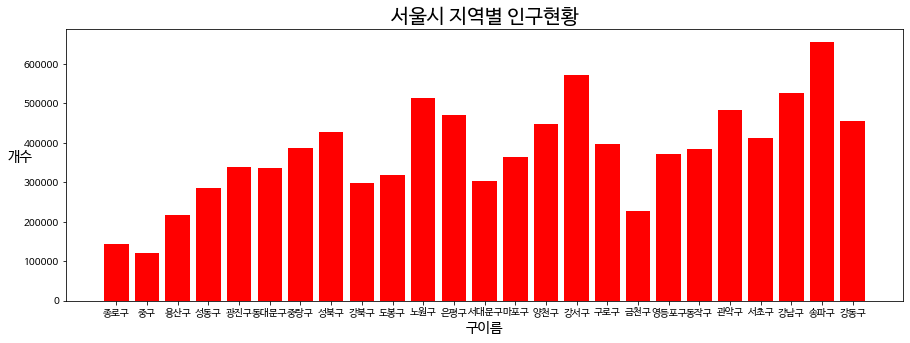

In [7]:
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (15,5)

plt.bar(df2.index, df2['계'], color='red')

plt.title('서울시 지역별 인구현황', fontsize=20)
plt.xlabel('구이름', fontsize=14)
plt.ylabel('개수',rotation='horizontal',fontsize=14)